In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score 
import xgboost as xgb
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('new_train.csv')

In [3]:
df_train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [4]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
df_train['y'] = df_train['y'].map({'yes': 1, 'no': 0})
df_train.y.head()

0    0
1    0
2    1
3    0
4    0
Name: y, dtype: int64

In [6]:
df_train.drop('pdays', axis = 1, inplace = True)
df_train.drop('previous', axis = 1, inplace = True)

In [7]:
y = df_train.y
df_train.drop('y', axis = 1, inplace = True)

In [8]:
df_train, df_val, y_train, y_val = train_test_split(df_train, y, test_size = 0.2)

In [9]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [10]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((26360, 56), (6590, 56), (26360,), (6590,))

# Logistic Regression

In [11]:
lrclf = LogisticRegression()
lrclf.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
lr_predicted = lrclf.predict(X_val)
lr_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
lr_score = accuracy_score(lr_predicted, y_val)
lr_score

0.8993930197268589

In [14]:
param_grid = {
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(0, 5, 10),
              'solver' : ['liblinear', 'lbfgs', 'newton-cg']
              }

In [15]:
grid_search = GridSearchCV(LogisticRegression(random_state=11), param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.90716995        nan        nan 0.9069044  0.90599393 0.90694234
        nan        nan        nan        nan 0.90618361 0.90709408
 0.90713202        nan        nan 0.9069044  0.90599393 0.90705615
        nan        nan        nan        nan 0.90618361 0.90709408
 0.90705615        nan        nan 0.90705615 0.90591806 0.90709408
        nan        nan        nan        nan 0.90618361 0.90709408
 0.90709408        nan        nan 0.90705615 0.90610774 0.90709408
        nan        nan        nan        nan 0.90618361 0.90709408
 0.90709408        nan        nan 0.90713202 0.90595599 0.90709408
        nan        nan        nan        nan 0.90618361 0.90709408
 0.90713202        nan        nan 0.90705615 0.90591806 0.90709408
        nan        nan        nan        nan 0.90618361 0.90709408
 0.90713202        nan   

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=11), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             verbose=True)

In [17]:
final_model = grid_search.best_estimator_
final_model

LogisticRegression(C=27825.59402207126, random_state=11, solver='liblinear')

In [18]:
y_pred = final_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.8993930197268589

# Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
dt_predicted = dt.predict(X_val)
dt_predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [21]:
dt_score = accuracy_score(dt_predicted, y_val)
dt_score

0.8792109256449165

In [22]:
param_grid = {
              'criterion' :['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth' : [4, 5, 6, 7, 8, 9],
              'min_samples_leaf': [1, 5, 10, 15, 20, 50],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
             }

In [23]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid=param_grid, verbose=True, n_jobs=-1)

In [24]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 50],
                         'splitter': ['best', 'random']},
             verbose=True)

In [25]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto', min_samples_leaf=10,
                       random_state=11)

In [26]:
y_pred = final_model.predict(X_val)
accuracy_score(y_pred, y_val)

0.8933232169954477

# Random Forest

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_val)
score = accuracy_score(pred, y_val)
score

0.9004552352048558

In [59]:
max_depth = [10, 15, 20, 25]
best_score = 0
rf_scores = {}
for depth in max_depth:
    score = []
    for n_estimator in list(np.arange(10, 201, 5)):
        rf = RandomForestClassifier(n_estimators=n_estimator, n_jobs = -1, max_depth = depth)
        rf.fit(X_train, y_train)
        pred = rf.predict(X_val)
        score.append((n_estimator, accuracy_score(pred, y_val)))
    rf_scores[depth] = score

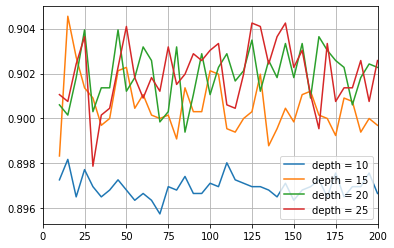

In [60]:
for depth, scores in rf_scores.items():
    plt.plot(*zip(*scores), label='depth = %d' % depth)
    plt.xlim(0, 200)
plt.grid()
plt.legend()
plt.show()

depth = 25 and n_estimators = 100 is giving the best result 

In [61]:
rf = RandomForestClassifier(n_estimators=100, n_jobs = -1, max_depth = 25)
rf.fit(X_train, y_train)
pred = rf.predict(X_val)
score = accuracy_score(pred, y_val)
score

0.9039453717754173

# XGBoost

In [62]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [63]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [64]:
%%capture output
# capture instruction that saves the result to output 
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [65]:
def parse_xgb_output(output):
    tree = []
    p_train = []
    p_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        p_train.append(train)
        p_val.append(val)

    return tree, p_train, p_val

tree, p_train, p_val = parse_xgb_output(output)

In [66]:
print('Best performance ', max(zip(p_val, tree)))

Best performance  (0.9243, 40)


Tuning 'eta'

In [67]:
%%capture output_010
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.1
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [68]:
tree, _, p_val = parse_xgb_output(output_010)
print(f'Eta={xgb_params["eta"]} : Best performance ', max(zip(p_val, tree)))

Eta=0.1 : Best performance  (0.92493, 99)


In [69]:
%%capture output_001
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.01
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [70]:
tree, _, p_val = parse_xgb_output(output_001)
print(f'Eta={xgb_params["eta"]} : Best performance ', max(zip(p_val, tree)))

Eta=0.01 : Best performance  (0.90721, 99)


Eta = 0.1 gives the best result

Tuning 'max_depth'

In [71]:
%%capture output_011
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 1
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [72]:
tree, _, p_val = parse_xgb_output(output_011)
print(f'max_depth={xgb_params["max_depth"]} : Best performance ', max(zip(p_val, tree)))

max_depth=1 : Best performance  (0.90025, 99)


In [73]:
%%capture output_100
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 2
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [74]:
tree, _, p_val = parse_xgb_output(output_100)
print(f'max_depth={xgb_params["max_depth"]} : Best performance ', max(zip(p_val, tree)))

max_depth=2 : Best performance  (0.916, 99)


In [75]:
%%capture output_101
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 4
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [76]:
tree, _, p_val = parse_xgb_output(output_101)
print(f'max_depth={xgb_params["max_depth"]} : Best performance ', max(zip(p_val, tree)))

max_depth=4 : Best performance  (0.9238, 99)


In [77]:
%%capture output_110
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 5
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [78]:
tree, _, p_val = parse_xgb_output(output_110)
print(f'max_depth={xgb_params["max_depth"]} : Best performance ', max(zip(p_val, tree)))

max_depth=5 : Best performance  (0.92497, 99)


max_depth = 5 gives the best result

In [79]:
%%capture output_111
# capture instruction that saves the result to output
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 5
xgb_params['min_child_weight'] = 2
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [80]:
tree, _, p_val = parse_xgb_output(output_111)
print(f'min_child_weight={xgb_params["min_child_weight"]} : Best performance ', max(zip(p_val, tree)))

min_child_weight=2 : Best performance  (0.92463, 99)


In [81]:
%%capture output_1001
# capture instruction that saves the result to output
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 5
xgb_params['min_child_weight'] = 3
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [82]:
tree, _, p_val = parse_xgb_output(output_1001)
print(f'min_child_weight={xgb_params["min_child_weight"]} : Best performance ', max(zip(p_val, tree)))

min_child_weight=3 : Best performance  (0.92563, 99)


eta = 0.1, max_depth = 5 and min_child_weight = 3 gives the best result

# Storing the best as pickle

In [83]:
with open('model.pkl', 'wb') as f:
    pkl.dump((dv, model), f)

In [84]:
with open('model.pkl', 'rb') as f:
    dv, model = pkl.load(f)

In [85]:
y_pred = model.predict(dval)

In [86]:
roc_auc_score(y_val, y_pred)

0.9256315792460431

## Prediction on new data

In [87]:
customer = {'age':'49', 
             'job':'blue-collar', 
             'marital':'married', 
             'education':'basic.9y', 
             'default':'unknown', 
             'housing':'no', 
             'load':'no', 
             'contact':'cellural', 
             'month':'nov', 
             'day_of_week':'wed', 
             'duration':227, 
             'campaign':4, 
             'poutcome':'nonexistent'}

In [88]:
features = dv.get_feature_names()
X = dv.transform([customer])
dX = xgb.DMatrix(X, feature_names = features)

In [89]:
model.predict(dX)

array([0.02833237], dtype=float32)